# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)

# Dataset Overview

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
print(f'this dataset contains of {df.shape[0]} rows and {df.shape[1]} columns')

this dataset contains of 396030 rows and 27 columns


In [4]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
# check missing values
round(df.isnull().sum()/len(df)*100,2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
dtype: float64

In [8]:
# check duplicate
df.duplicated().sum()

0

# Data Exploration

In [18]:
eda = df.copy()

num = eda.select_dtypes(include='number').columns
cat = eda.select_dtypes(include='object').columns

In [4]:
print(len(num))
print(len(cat))

12
15


## Descriptive Statistic

In [12]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


## Univariate Analysis

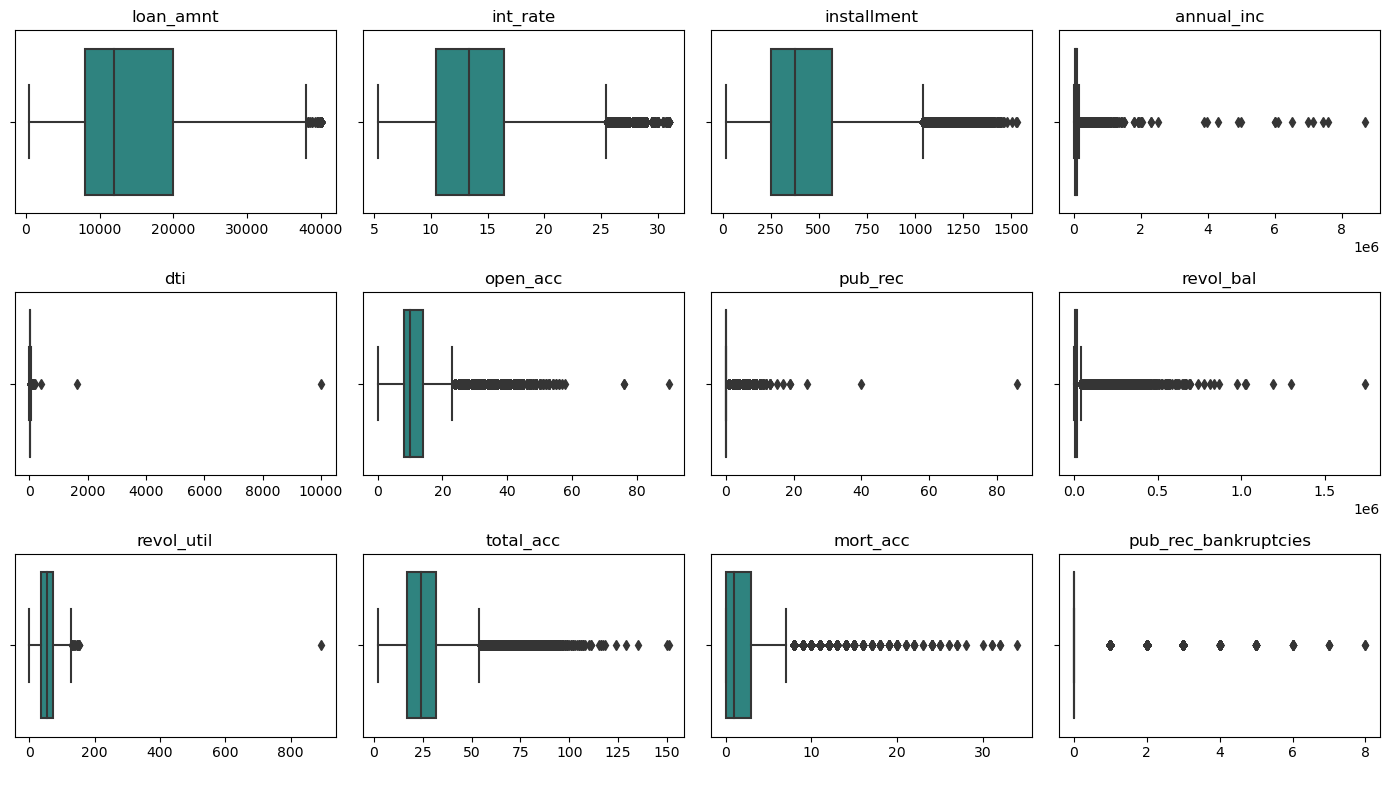

In [13]:
# numeric features analysis
plt.figure(figsize=(14,8))
for i in range(0,len(num)):
    plt.subplot(3,4,i+1)
    sns.boxplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i])
    plt.xlabel(' ')
    plt.tight_layout()

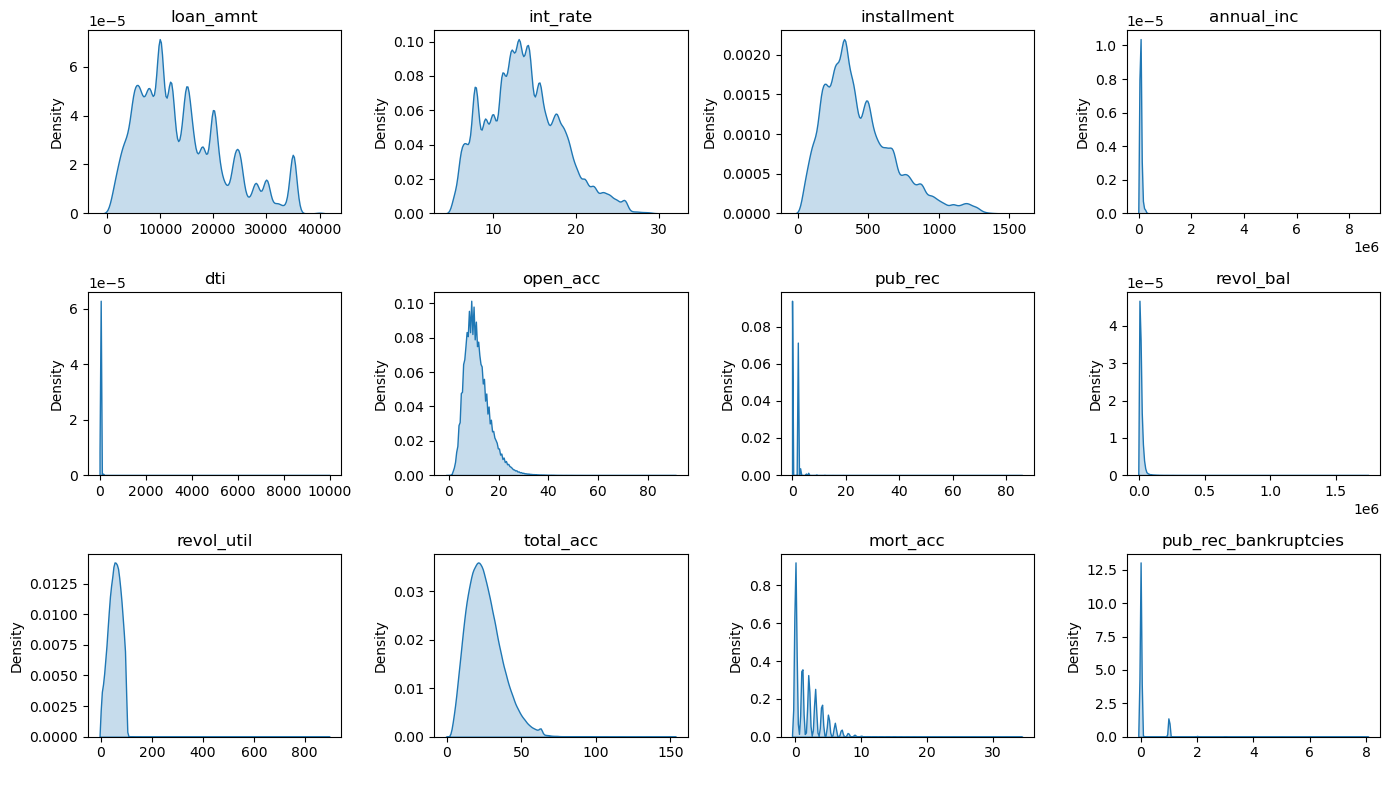

In [7]:
# numeric features analysis
plt.figure(figsize=(14,8))
for i in range(0,len(num)):
    plt.subplot(3,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', shade=True)
    plt.title(num[i])
    plt.xlabel(' ')
    plt.tight_layout()

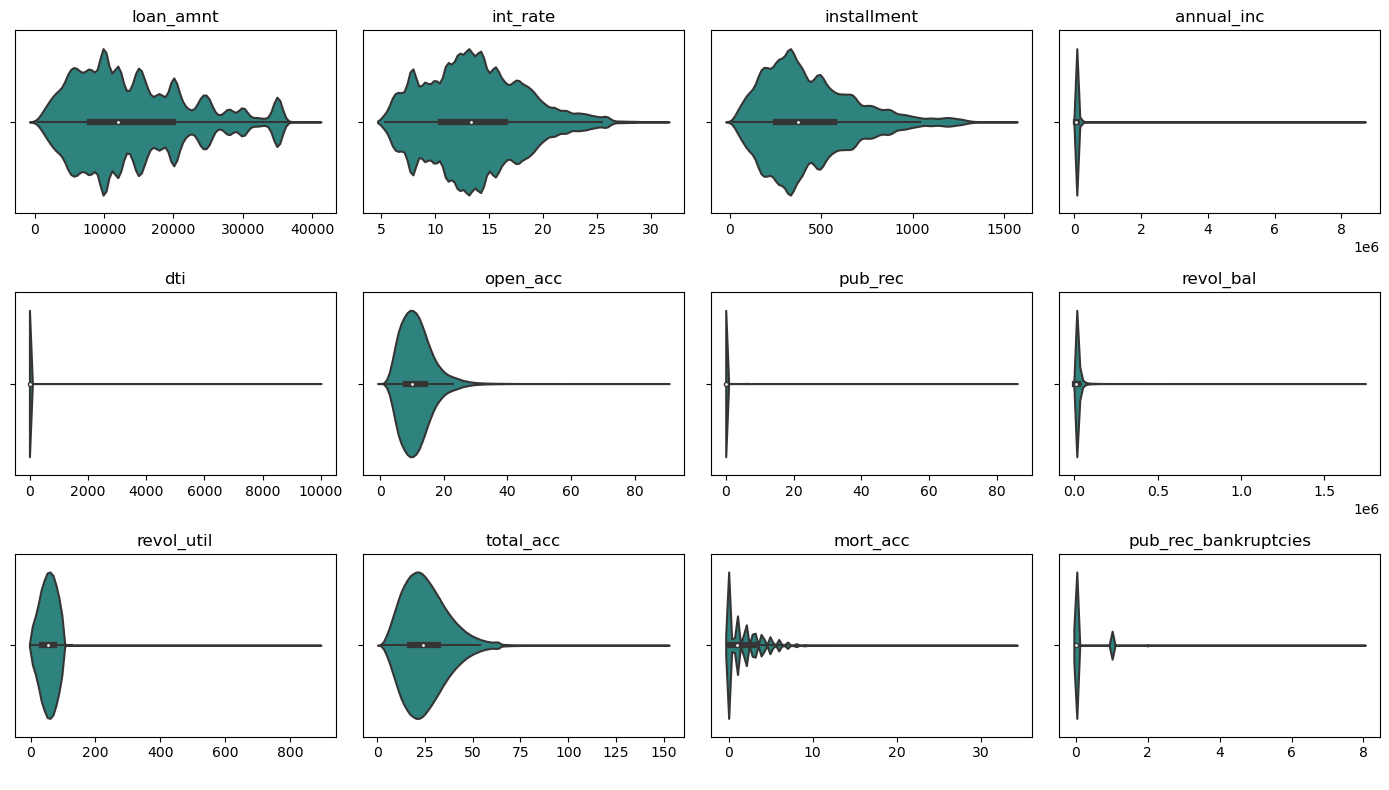

In [6]:
# numeric features analysis
plt.figure(figsize=(14,8))
for i in range(0,len(num)):
    plt.subplot(3,4,i+1)
    sns.violinplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i])
    plt.xlabel(' ')
    plt.tight_layout()

In [10]:
eda[cat].nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              173105
emp_length                 11
home_ownership              6
verification_status         3
issue_d                   115
loan_status                 2
purpose                    14
title                   48817
earliest_cr_line          684
initial_list_status         2
application_type            3
address                393700
dtype: int64

In [19]:
cat = cat.drop(['emp_title','issue_d','title','earliest_cr_line','address'])

In [20]:
len(cat)

10

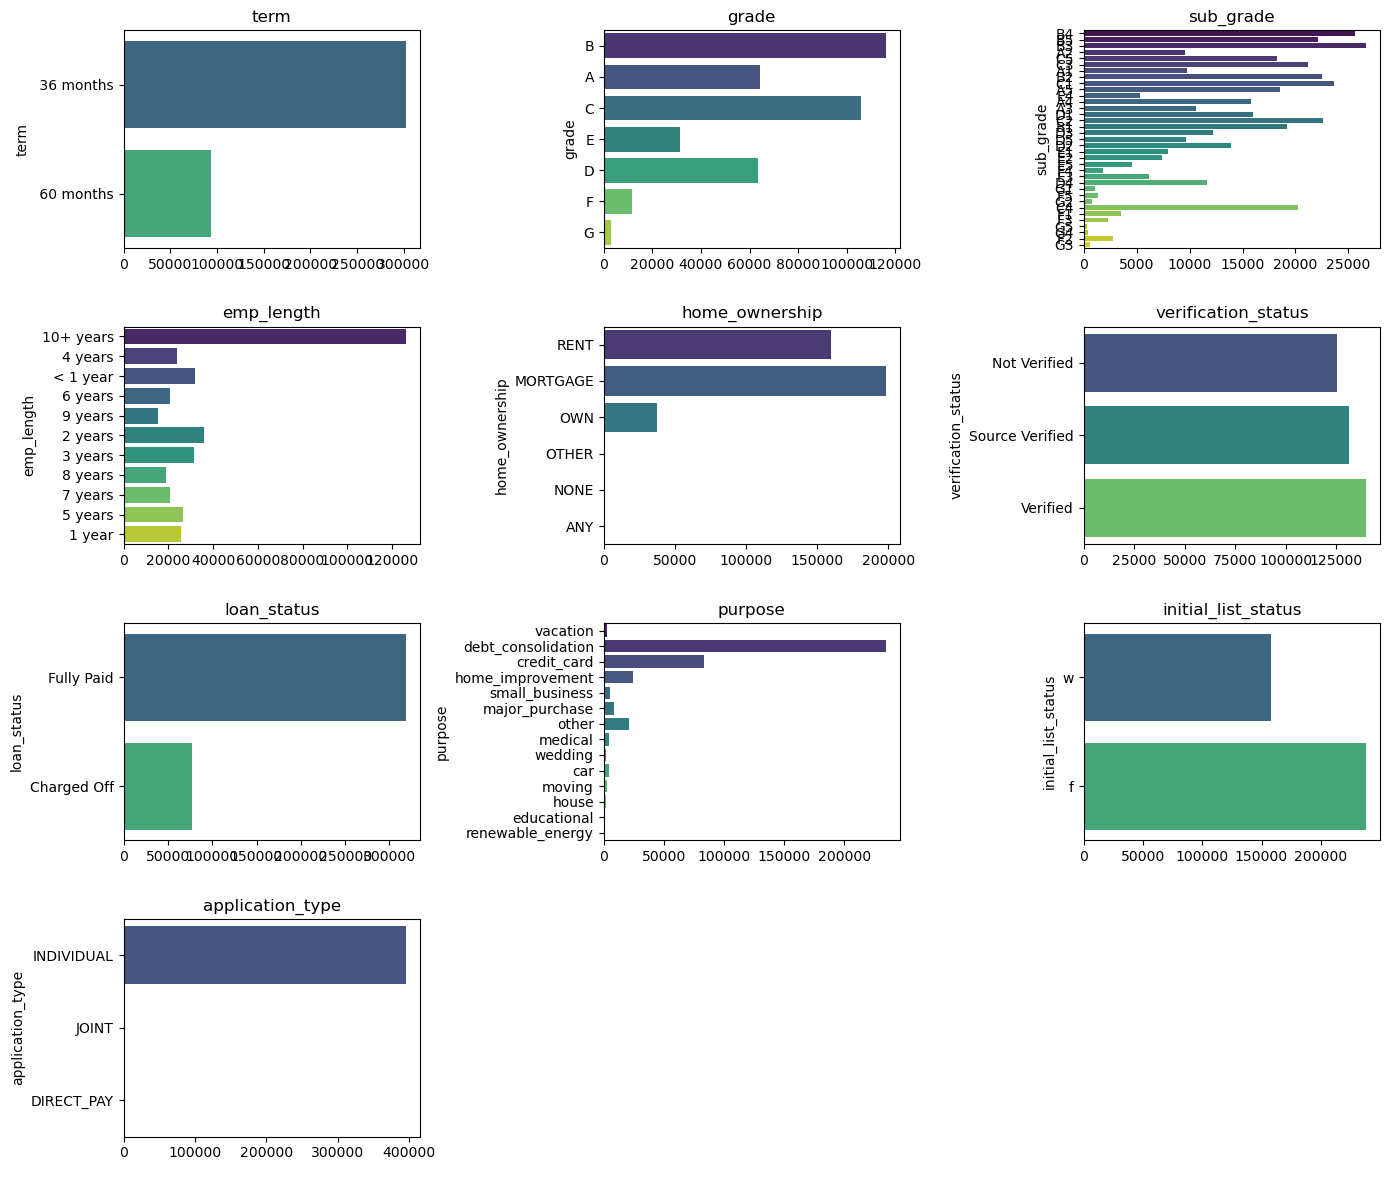

In [21]:
# numeric features analysis
plt.figure(figsize=(14,12))
for i in range(0,len(cat)):
    plt.subplot(4,3,i+1)
    sns.countplot(y=eda[cat[i]], palette='viridis')
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

## Bivariate Analysis

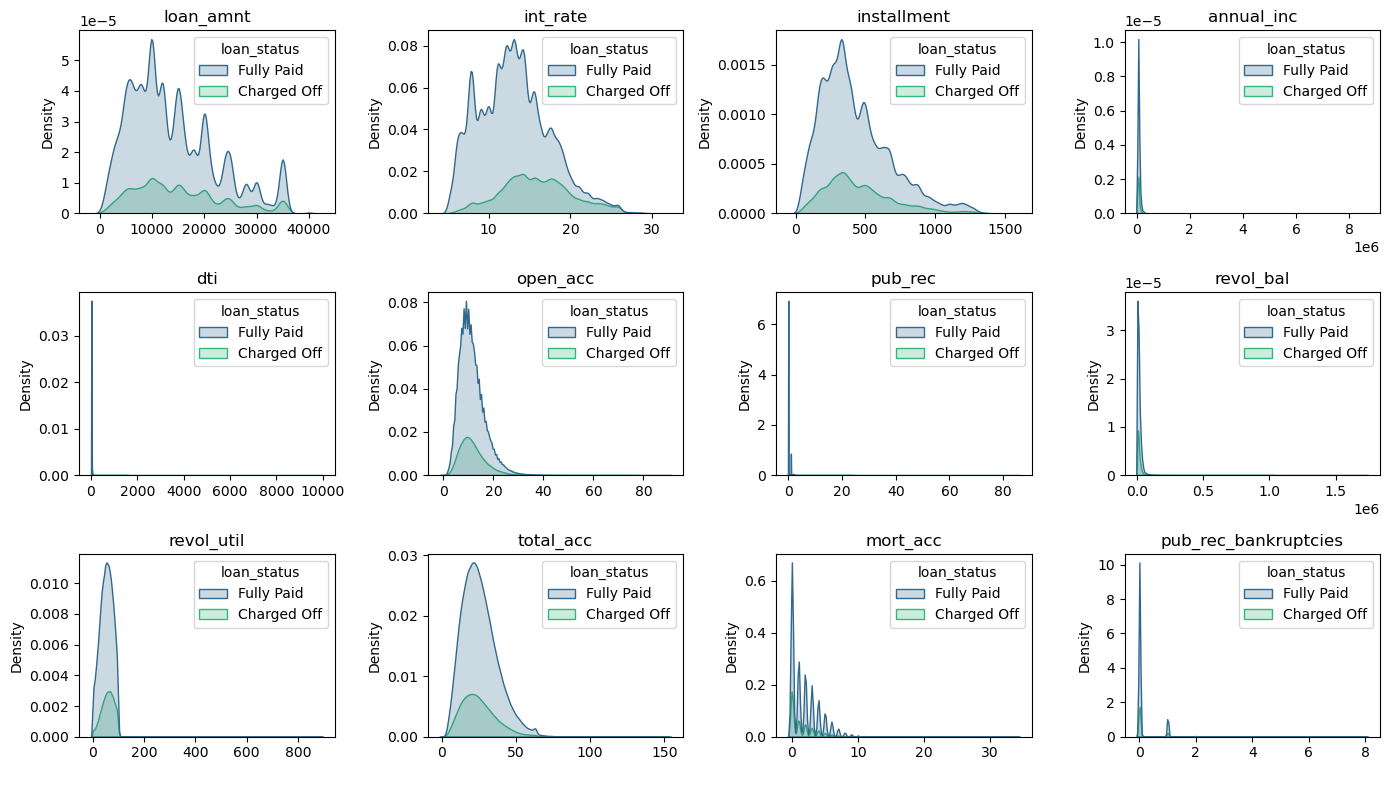

In [24]:
# numeric features analysis
plt.figure(figsize=(14,8))
for i in range(0,len(num)):
    plt.subplot(3,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', shade=True, hue=eda['loan_status'])
    plt.title(num[i])
    plt.xlabel(' ')
    plt.tight_layout()

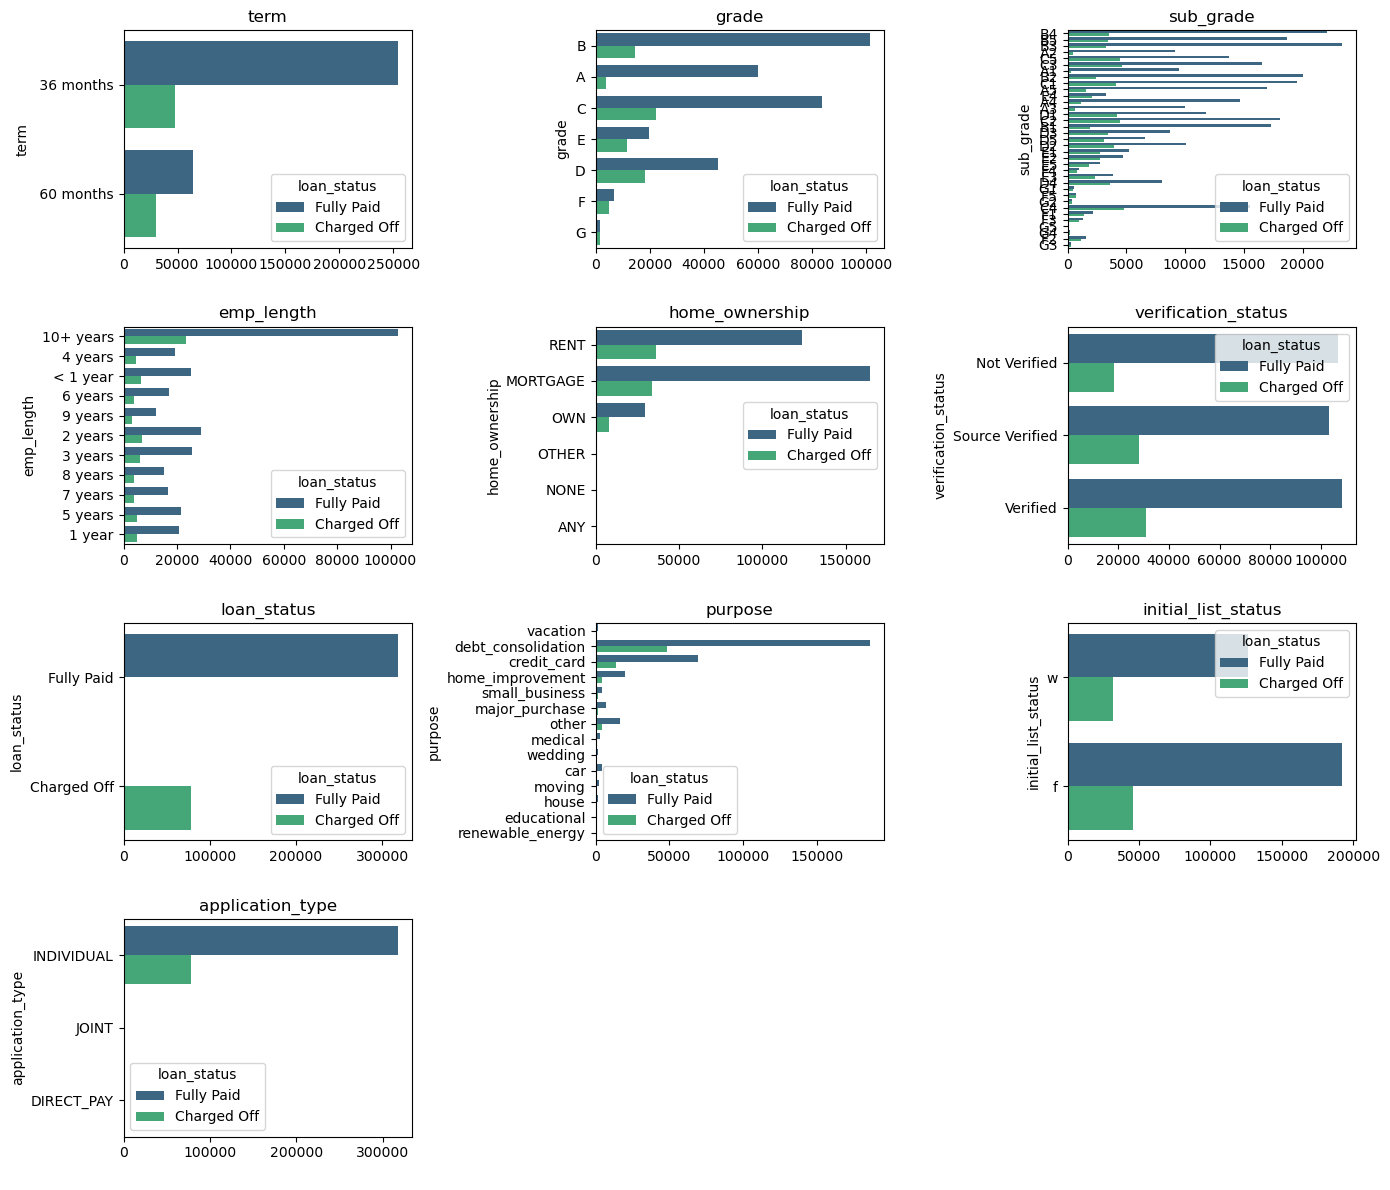

In [25]:
# numeric features analysis
plt.figure(figsize=(14,12))
for i in range(0,len(cat)):
    plt.subplot(4,3,i+1)
    sns.countplot(y=eda[cat[i]], palette='viridis', hue=eda['loan_status'])
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

# Data Preparation

## Feature Engineering

### Target Feature

In [27]:
# target feature
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df = df.drop('loan_status',axis=1)

### emp_title

In [29]:
df['emp_title'].nunique()

173105

In [30]:
# Realistically there are too many unique job titles to try to convert this to a dummy variable feature. 
# we remove that emp_title column.
df = df.drop('emp_title',axis=1)

### emp_length

In [33]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

<AxesSubplot:xlabel='emp_length', ylabel='count'>

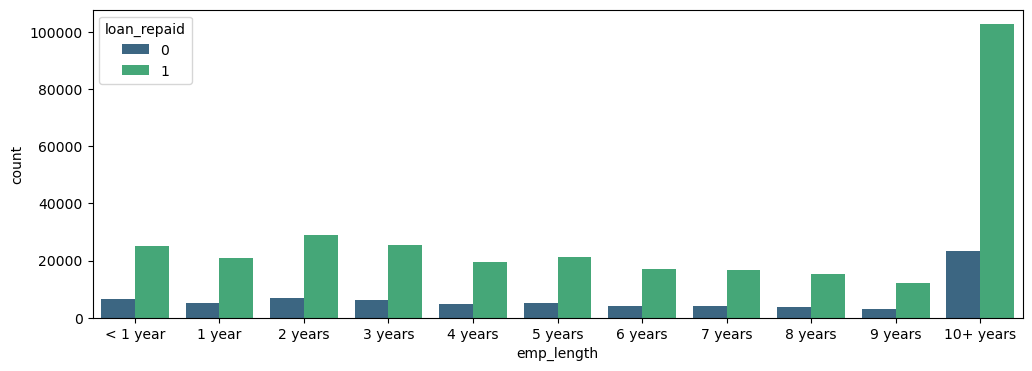

In [35]:
emp_length_order = [ '< 1 year','1 year','2 years','3 years','4 years',
                     '5 years','6 years','7 years','8 years','9 years','10+ years']

plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_repaid',palette='viridis')

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category

In [39]:
emp_co = df[df['loan_repaid']==0].groupby('emp_length').count()['loan_repaid']
emp_fp = df[df['loan_repaid']==1].groupby('emp_length').count()['loan_repaid']
emp_len = emp_co/emp_fp

In [40]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_repaid, dtype: float64

<AxesSubplot:xlabel='emp_length'>

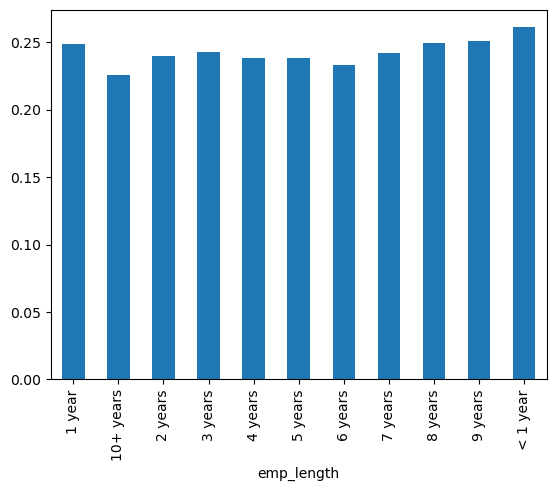

In [41]:
emp_len.plot(kind='bar')

Charge off rates are extremely similar across all employment lengths. we'll drop the emp_length columnm

In [42]:
df = df.drop('emp_length',axis=1)

### title

In [43]:
df['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [44]:
df['title'].nunique()

48817

In [45]:
df = df.drop('title',axis=1)

### grade feature

In [73]:
# We already know grade is part of sub_grade, so just drop the grade feature.
df = df.drop('grade',axis=1)

### issue_d

In [86]:
df['issue_d'].head()

0    Jan-2015
1    Jan-2015
2    Jan-2015
3    Nov-2014
4    Apr-2013
Name: issue_d, dtype: object

we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date,we'll drop this feature

In [87]:
df = df.drop('issue_d',axis=1)

## Handling Missing Values

### mort_acc

In [49]:
df['mort_acc'].isna().sum()/len(df)*100

9.543468929121532

In [46]:
df['mort_acc'].value_counts() # mort_acc : Number of mortgage accounts

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [50]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Looks like the `total_acc` feature correlates with the `mort_acc` , this makes sense! Let's try this fillna() approach. We will group the dataframe by the `total_acc` and calculate the mean value for the `mort_acc` per `total_acc` entry. 

In [53]:
df['total_acc'].unique()

array([ 25.,  27.,  26.,  13.,  43.,  23.,  15.,  40.,  37.,  61.,  35.,
        22.,  20.,  36.,  38.,   7.,  18.,  10.,  17.,  29.,  16.,  21.,
        34.,   9.,  14.,  59.,  41.,  19.,  12.,  30.,  56.,  24.,  28.,
         8.,  52.,  31.,  44.,  39.,  50.,  11.,  62.,  32.,   5.,  33.,
        46.,  42.,   6.,  49.,  45.,  57.,  48.,  67.,  47.,  51.,  58.,
         3.,  55.,  63.,  53.,   4.,  71.,  69.,  54.,  64.,  81.,  72.,
        60.,  68.,  65.,  73.,  78.,  84.,   2.,  76.,  75.,  79.,  87.,
        77., 104.,  89.,  70., 105.,  97.,  66., 108.,  74.,  80.,  82.,
        91.,  93., 106.,  90.,  85.,  88.,  83., 111.,  86., 101., 135.,
        92.,  94.,  95.,  99., 102., 129., 110., 124., 151., 107., 118.,
       150., 115., 117.,  96.,  98., 100., 116., 103.])

In [54]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

`Let's fill in the missing `mort_acc values based on their `total_acc` value. If the `mort_acc` is missing, then we will fill in that missing value with the mean value corresponding to its `total_acc` value from the Series we created above

In [55]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [57]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    we will checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [58]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [61]:
round(df.isnull().sum()/len(df)*100,2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
purpose                 0.00
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                0.00
pub_rec_bankruptcies    0.14
address                 0.00
loan_repaid             0.00
dtype: float64

### Drop Missing Values

`revol_util` and the `pub_rec_bankruptcies` have missing data points, but they account for less than 0.5% of the total data

In [63]:
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Feature Encoding

In [67]:
cat = df.select_dtypes(['object']).columns
cat

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### term

In [68]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [72]:
# Or just use .map()
df['term'] = df['term'].apply(lambda term: int(term[:3])) # first 2 character
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### sub_grade

In [76]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [77]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [78]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

### Feature : verification_status, application_type,initial_list_status,purpose

In [79]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

### home_ownership

In [80]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [81]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

### address

In [82]:
df['address'].head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [83]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])
df['zip_code'].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: zip_code, dtype: object

In [84]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### earliest_cr_line

In [89]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [92]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:])) # extract year
df = df.drop('earliest_cr_line',axis=1)
df['earliest_cr_year'].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_year, dtype: int64

## Train Test Split

In [93]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

X_train.shape, X_test.shape

((316175, 78), (79044, 78))

## Normalizing the Data

In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

## Build Model

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [98]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

2022-08-07 17:24:49.528006: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training

In [99]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 6s 4ms/step - loss: 0.2971 - val_loss: 0.2646
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2651 - val_loss: 0.2636
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2626 - val_loss: 0.2626
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2615 - val_loss: 0.2618
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2608 - val_loss: 0.2618
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2600 - val_loss: 0.2617
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2600 - val_loss: 0.2614
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2595 - val_loss: 0.2619
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2592 - val_loss: 0.2613
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.258

## Evaluating Model

<AxesSubplot:>

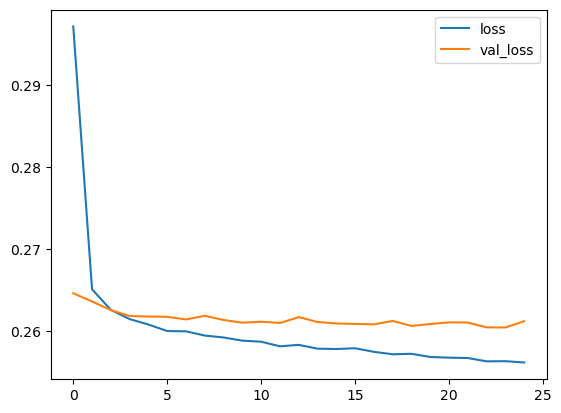

In [100]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [101]:
from sklearn.metrics import classification_report,confusion_matrix

predictions =(model.predict(X_test)>0.5).astype('int32')
print(classification_report(y_test,predictions))

2471/2471 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [102]:
confusion_matrix(y_test,predictions)

array([[ 7050,  8608],
       [  239, 63147]])